In [2]:
#exploring my 23 and me raw data
#adapted from and inspired by: Know Thyself: Using Data Science to Explore Your Own Genome by lorarjohns

#import packages
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import glob

In [3]:
#webdriver
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
options = Options()
options.add_argument('--no-sandbox')
options.add_argument('--headless')
options.add_argument('--disable-dev-shm-usage')
options.add_argument("--remote-debugging-port=9222")



In [4]:
#import 23 and me raw data
data = pd.read_csv('genome.txt', sep='\t', na_values='---', dtype={'rsid':'str', 'chromosome':'object', 'position':'int', 'genotype':'str'}, comment='#', names=["rsid", "chromosome", "position", "genotype"])

data.head(50)
#check for na values
#data.isna().any()

,rsid,chromosome,position,genotype
0,rs548049170,1,69869,TT
1,rs9283150,1,565508,AA
2,rs116587930,1,727841,GG
3,rs3131972,1,752721,GG
4,rs12184325,1,754105,CC
5,rs12567639,1,756268,AA
6,rs114525117,1,759036,GG
7,rs12124819,1,776546,AA
8,rs12127425,1,794332,GG
9,rs79373928,1,801536,TT


In [5]:
#data = pd.read_csv('genome.txt', sep='\t', na_values='---', dtype={'rsid':'str', 'chromosome':'object', 'position':'int', 'genotype':'str'}, comment='#', names=["rsid", "chromosome", "position", "genotype"])

data['chromosome'].unique()

#rename X chromosome to 23
data['chromosome'] = data['chromosome'].apply(lambda x:
    re.sub(r'X', r'23', x))
#rename Y chromosome to 24
data['chromosome'] = data['chromosome'].apply(lambda x:
    re.sub(r'MT', r'24', x))

# filter out empty Y data
data = data[data['chromosome'] != 'Y']
data['chromosome'] = data['chromosome'].apply(lambda x: 
	int(x))

data



,rsid,chromosome,position,genotype
0,rs548049170,1,69869,TT
1,rs9283150,1,565508,AA
2,rs116587930,1,727841,GG
3,rs3131972,1,752721,GG
4,rs12184325,1,754105,CC
...,...,...,...,...
631986,i4000693,24,16524,A
631987,i704756,24,16524,A
631988,i705255,24,16525,A
631989,i4000757,24,16526,G


In [6]:
#create chromosome dict
chromosome_dict = {1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 
				   6:'6', 7:'7', 8:'8', 9:'9', 10:'10', 
				   11:'11', 12:'12', 13:'13', 14:'14', 
				   15:'15', 16:'16', 17:'17', 18:'18', 
				   19:'19', 20:'20', 21:'21', 22:'22', 
				   23:'X', 24:'MT'}

print(chromosome_dict)

#check if chromosome is now int64 datatype
display(data.info())

{1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10', 11: '11', 12: '12', 13: '13', 14: '14', 15: '15', 16: '16', 17: '17', 18: '18', 19: '19', 20: '20', 21: '21', 22: '22', 23: 'X', 24: 'MT'}
<class 'pandas.core.frame.DataFrame'>
Int64Index: 628490 entries, 0 to 631990
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   rsid        628490 non-null  object
 1   chromosome  628490 non-null  int64 
 2   position    628490 non-null  int64 
 3   genotype    628490 non-null  object
dtypes: int64(2), object(2)
memory usage: 24.0+ MB


None

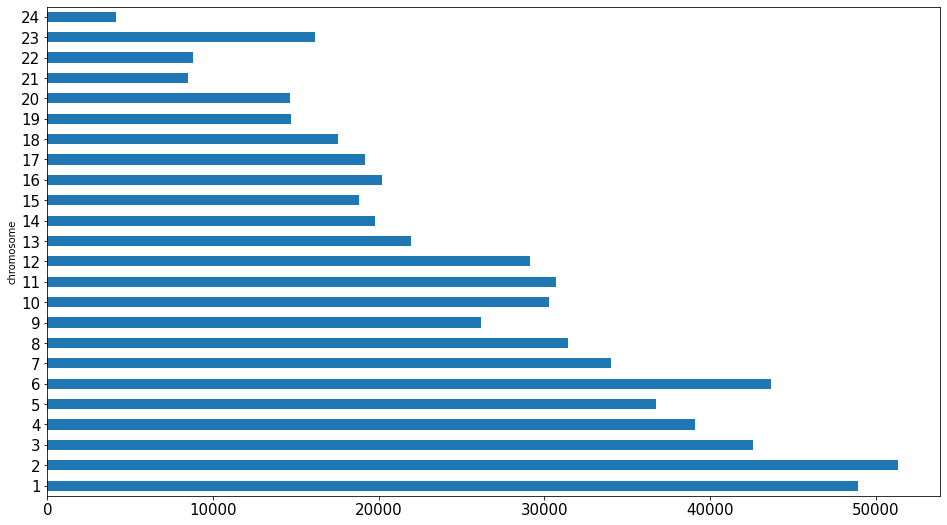

In [7]:
#remove whitespace from column name
data.rename({' rsid': 'rsid'}, axis='columns', inplace=True)

#how many snps are there per chromosome?
rsid_per_chromosome = data.groupby('chromosome')['rsid'].count()
rsid_per_chromosome.columns = ['chromosome','count']
rsid_per_chromosome.plot.barh(figsize=(16,9), fontsize=15)
plt.show()

In [8]:
#load in data from SNPedia
all_files = glob.glob("./csv from snpedia/*.csv")

#concat SNPedia data files to one file
snp_df = pd.concat((pd.read_csv(f) for f in all_files))
snp_df

,Unnamed: 0,Magnitude,Repute,Summary
0,Rs1801253(G;G),0.0,Good,NaN
1,Rs1801253(C;C),1.1,NaN,responds well to bucindolol; may also depend o...
2,Rs17822931(C;C),2.0,NaN,Wet earwax. Normal body odour. Normal colostrum.
3,Rs17822931(T;T),2.5,Good,Dry earwax. No body odour. Likely Asian ancest...
4,Rs16891982(C;C),1.1,Good,"generally non-European, but if European, 7x mo..."
...,...,...,...,...
495,Rs28936388(C;C),0.0,Good,common in clinvar
496,Rs28936395(G;G),0.0,Good,common in clinvar
497,Rs28936396(C;C),0.0,Good,common in clinvar
498,Rs28938472(A;A),0.0,Good,common in clinvar


In [9]:
#extracting genotype out of unnamed:0 column 
snp_df['genotype'] = snp_df['Unnamed: 0'].apply(lambda x: 
	re.sub(r'.*([AGCT]);([AGCT])\)', r'\1\2', x))

#rename columns
new_cols = ['rsid', 'magnitude', 'repute', 
'summary', 'genotype']
snp_df.columns = new_cols

#changing rsid to lowercase and removing genotype from unnamed:0 column
snp_df['rsid'] = snp_df['rsid'].map(lambda x : x.lower())
snp_df['rsid'] = snp_df['rsid'].map(lambda x : 
	re.sub(r'([a-z]{1,}[\d]+)\([agct];[agct]\)', 
	r'\1', x))
snp_df

,rsid,magnitude,repute,summary,genotype
0,rs1801253,0.0,Good,NaN,GG
1,rs1801253,1.1,NaN,responds well to bucindolol; may also depend o...,CC
2,rs17822931,2.0,NaN,Wet earwax. Normal body odour. Normal colostrum.,CC
3,rs17822931,2.5,Good,Dry earwax. No body odour. Likely Asian ancest...,TT
4,rs16891982,1.1,Good,"generally non-European, but if European, 7x mo...",CC
...,...,...,...,...,...
495,rs28936388,0.0,Good,common in clinvar,CC
496,rs28936395,0.0,Good,common in clinvar,GG
497,rs28936396,0.0,Good,common in clinvar,CC
498,rs28938472,0.0,Good,common in clinvar,AA


In [10]:
#removing null values from repute and summary
null_repute = snp_df[snp_df['repute'].isnull()]
null_summaries = snp_df[snp_df['summary'].isnull()]
null_repute_and_summaries = pd.concat([null_repute,null_summaries]).drop_duplicates().reset_index(drop=True)
display(null_repute_and_summaries)

#fill na values
snp_df['repute'].fillna(value='Neutral', inplace=True)
snp_df['summary'].fillna(value='None', inplace=True)
snp_df.isna().any()


,rsid,magnitude,repute,summary,genotype
0,rs1801253,1.1,NaN,responds well to bucindolol; may also depend o...,CC
1,rs17822931,2.0,NaN,Wet earwax. Normal body odour. Normal colostrum.,CC
2,rs16891982,1.1,NaN,Generally European; Light skin; Possibly an in...,GG
3,rs1426654,2.7,NaN,"probably light-skinned, European ancestry",AA
4,rs1426654,2.6,NaN,"probably darker-skinned, Asian or African ance...",GG
...,...,...,...,...,...
1688,rs11964281,0.0,Good,NaN,CC
1689,rs3774923,0.0,Good,NaN,GG
1690,rs28371694,0.0,Good,NaN,CC
1691,rs2619522,0.0,Good,NaN,TT


rsid         False
magnitude    False
repute       False
summary      False
genotype     False
dtype: bool

In [13]:
#create new df merging snpedia data with 23 and me raw data
new_df = snp_df.merge(data, how='inner', on=['rsid', 'genotype'], suffixes=('_SNPedia', '_myDNA'))

#create df to display bad genes, ascend by magnitude
bad = new_df[new_df['repute'] == 'Bad'].sort_values('magnitude', ascending = False)

#create df to display neutral genes, ascend by magnitude
neutral = new_df[new_df['repute'] == 'Neutral'].sort_values('magnitude', ascending = False)

#create df to display good genes, ascend by magnitude
good = new_df[new_df['repute'] == 'Good'].sort_values('magnitude', ascending = False)

#create df to display interesting genes, ascend by magnitude (greater than magnitude 4)
interesting = new_df[new_df['magnitude'] > 4].sort_values('magnitude', ascending = False)

bad

,rsid,magnitude,repute,summary,genotype,chromosome,position
784,rs62514958,5.9,Bad,Non-phenylketonuria hyperphenylalaninemia geno...,GG,12,103240677
171,rs28930069,5.0,Bad,Hypokalemic periodic paralysis risk,GG,1,201022667
104,rs28936383,5.0,Bad,Limb-girdle muscular dystrophy-dystroglycanopathy,GG,4,52895065
105,rs28936383,5.0,Bad,Limb-girdle muscular dystrophy-dystroglycanopathy,GG,4,52895065
203,rs1800462,3.5,Bad,incapable of detoxifying certain drugs,CC,6,18143955
...,...,...,...,...,...,...,...
37,rs1333040,0.0,Bad,"1.24x increased myocardial infarction risk, ~1...",CT,9,22083404
282,rs2308327,0.0,Bad,normal,AA,10,131565170
489,rs8177374,0.0,Bad,"very common, but it seems better to have the m...",CC,11,126162843
321,rs10761659,0.0,Bad,1.5x risk of Crohn's disease,AA,10,64445564


In [37]:
#find research articles that reference my genes

# Get the base URL from SNPedia
import time
base_url = 'https://www.snpedia.com/index.php/'

genes = [bad, neutral, interesting]
urlDictionary = {}
for table in genes:
    gene_urls = [base_url + rsid for rsid in table['rsid']]
    print(gene_urls)
    title = f'{table=}'.split('=')[0]
    urlDictionary[title] = gene_urls

print(urlDictionary)

# Initialize Selenium
browser = webdriver.Chrome(chrome_options=options)
# Write a function to visit the SNPedia URLs, click through to PubMed,
# and retrieve the info on the articles for each gene


def scrape_abstracts(urls):

    rsid_list = []
    all_article_title = []
    all_article_citation = []
    all_article_authors = []
    # all_article_abstract = []
    all_article_links = []
    for url in urls:
        link_urls = []
        browser.get(url)  # load url
        rsid = browser.find_element_by_css_selector('.firstHeading').text
        links_elements = browser.find_elements_by_partial_link_text('PMID')

        # get the URLs to the PubMed pages
        for link in links_elements:
            tempUrl = link.get_attribute('href')
            link_urls.append(tempUrl.split("?")[0])
        print(len(link_urls))
        # follow each link element to PubMed
        for element in link_urls:
            browser.get(element)
            time.sleep(2)
            citation_title = browser.find_element(By.XPATH, "//meta[@name='citation_title']")
            article_title = citation_title.get_attribute('content')
            citation_authors = browser.find_element(By.XPATH, "//meta[@name='citation_authors']")
            article_authors = citation_authors.get_attribute('content')
            citation_journal_title = browser.find_element(By.XPATH, "//meta[@name='citation_journal_title']")
            article_citation = citation_journal_title.get_attribute('content')
            # abs = browser.find_element_by_class_name('abstract')

            rsid_list.append(rsid)
            all_article_title.append(article_title)
            all_article_citation.append(article_citation)
            all_article_authors.append(article_authors)
            # all_article_abstract.append(abs)
            all_article_links.append(element)

        # store the information
    df = pd.DataFrame()
    df['rsid'] = rsid_list
    df['article_title'] = all_article_title
    df['article_citation'] = all_article_citation
    df['article_authors'] = all_article_authors
    # df['article_abstract'] = all_article_abstract
    df['link'] = all_article_links

    df = df.drop_duplicates()

    df.index = range(len(df.index))
    return df
writer = pd.ExcelWriter('./results/interesting_genes.xlsx', engine='xlsxwriter')

for key in urlDictionary:
    abstracts_df = scrape_abstracts(urlDictionary[key])
    abstracts_df.to_excel(writer, sheet_name=key)
writer.save()




           rsid  magnitude repute  \
784  rs62514958        5.9    Bad   
171  rs28930069        5.0    Bad   
104  rs28936383        5.0    Bad   
105  rs28936383        5.0    Bad   
203   rs1800462        3.5    Bad   
..          ...        ...    ...   
37    rs1333040        0.0    Bad   
282   rs2308327        0.0    Bad   
489   rs8177374        0.0    Bad   
321  rs10761659        0.0    Bad   
272    rs440446        0.0    Bad   

                                               summary genotype  chromosome  \
784  Non-phenylketonuria hyperphenylalaninemia geno...       GG          12   
171                Hypokalemic periodic paralysis risk       GG           1   
104  Limb-girdle muscular dystrophy-dystroglycanopathy       GG           4   
105  Limb-girdle muscular dystrophy-dystroglycanopathy       GG           4   
203             incapable of detoxifying certain drugs       CC           6   
..                                                 ...      ...         ...   
37

/tmp/ipykernel_1401/4239684641.py:15: DeprecationWarning: use options instead of chrome_options
  browser = webdriver.Chrome(chrome_options=options)
/tmp/ipykernel_1401/4239684641.py:31: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  rsid = browser.find_element_by_css_selector('.firstHeading').text
/tmp/ipykernel_1401/4239684641.py:32: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  links_elements = browser.find_elements_by_partial_link_text('PMID')


0
0
0
5
